In [ ]:
'''
Word2vec Architecture : There are two architectures used by word2vec
    1. CBOW (Continuous Bag Of words)
    2. SKIP- Gram model
    
Word2vec : 
    - Word2vec is a two-layer neural net that processes text.
    - Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus.
    - While Word2vec is not a deep neural network, it turns text into a numerical form that deep nets can understand.

CBOW (Continuous Bag of Words) : 
    - In CBOW, the current word is predicted using the window of surrounding context windows.
    - CBOW model predicts the current word given context words within specific window. 
    - The input layer contains the context words and the output layer contains the current word. 
    - The hidden layer contains the number of dimensions in which we want to represent current word present at the output layer.
    - Several times faster to train than the skip-gram, slightly better accuracy for the frequent words

Skip Gram : 
    - Skip-Gram performs opposite of CBOW which implies that it predicts the given sequence or context from the word.
    - Skip gram predicts the surrounding context words within specific window given current word. 
    - The input layer contains the current word and the output layer contains the context words. 
    - The hidden layer contains the number of dimensions in which we want to represent current word present

In [ ]:
'''
Cbow: Predicting the probability of word from the context of the words

Skipgram : Here, The input is centerword and the predictions are the context words.

Skip-grams (SG): Predict context words (position independent) given center word.

Continuous Bag of Words (CBOW): Predict center word from (bag of) context word.

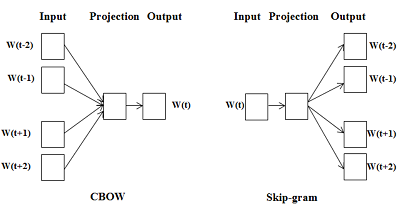

### CBOW

In [ ]:
'''
CBOW

Actual Text :

[['beginning', 'god', 'created', 'heaven', 'earth'],
 ['earth', 'without', 'form', 'void', 'darkness', 'upon', 'face', 'deep'],
 ['spirit', 'god', 'moved', 'upon', 'face', 'waters']]


CBOW: Building (context, target) generator

input: [['god', 'created']]  output: ['beginning']
input: [['beginning', 'created', 'heaven']]  output: ['god']
input: [['beginning', 'god', 'heaven', 'earth']]  output: ['created']
input: [['god', 'created', 'earth']]  output: ['heaven']
input: [['created', 'heaven']]  output: ['earth']
input: [['without', 'form']]  output: ['earth']
input: [['earth', 'form', 'void']]  output: ['without']
input: [['earth', 'without', 'void', 'darkness']]  output: ['form']
input: [['without', 'form', 'darkness', 'upon']]  output: ['void']
input: [['form', 'void', 'upon', 'face']]  output: ['darkness']
input: [['void', 'darkness', 'face', 'deep']]  output: ['upon']
input: [['darkness', 'upon', 'deep']]  output: ['face']
input: [['upon', 'face']]  output: ['deep']
input: [['god', 'moved']]  output: ['spirit']
input: [['spirit', 'moved', 'upon']]  output: ['god']
input: [['spirit', 'god', 'upon', 'face']]  output: ['moved']
input: [['god', 'moved', 'face', 'waters']]  output: ['upon']
input: [['moved', 'upon', 'waters']]  output: ['face']
input: [['upon', 'face']]  output: ['waters']

# Word to id:
{'god': 1,
 'earth': 2,
 'upon': 3,
 'face': 4,
 'beginning': 5,
 'created': 6,
 'heaven': 7,
 'without': 8,
 'form': 9,
 'void': 10,
 'darkness': 11,
 'deep': 12,
 'spirit': 13,
 'moved': 14,
 'waters': 15}

After Word to Id:

input: [[1, 6]]  output: [5]
input: [[5, 6, 7]]  output: [1]
input: [[5, 1, 7, 2]]  output: [6]
input: [[1, 6, 2]]  output: [7]
input: [[6, 7]]  output: [2]
input: [[8, 9]]  output: [2]
input: [[2, 9, 10]]  output: [8]
input: [[2, 8, 10, 11]]  output: [9]
input: [[8, 9, 11, 3]]  output: [10]
input: [[9, 10, 3, 4]]  output: [11]
input: [[10, 11, 4, 12]]  output: [3]
input: [[11, 3, 12]]  output: [4]
input: [[3, 4]]  output: [12]
input: [[1, 14]]  output: [13]
input: [[13, 14, 3]]  output: [1]
input: [[13, 1, 3, 4]]  output: [14]
input: [[1, 14, 4, 15]]  output: [3]
input: [[14, 3, 15]]  output: [4]
input: [[3, 4]]  output: [15]


After padding and Sequence:

input: [[0 0 0 0 0 1 6]]  output: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[0 0 0 0 5 6 7]]  output: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[0 0 0 5 1 7 2]]  output: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[0 0 0 0 1 6 2]]  output: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[0 0 0 0 0 6 7]]  output: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[0 0 0 0 0 8 9]]  output: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[ 0  0  0  0  2  9 10]]  output: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
input: [[ 0  0  0  2  8 10 11]]  output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
input: [[ 0  0  0  8  9 11  3]]  output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
input: [[ 0  0  0  9 10  3  4]]  output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
input: [[ 0  0  0 10 11  4 12]]  output: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[ 0  0  0  0 11  3 12]]  output: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[0 0 0 0 0 3 4]]  output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
input: [[ 0  0  0  0  0  1 14]]  output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
input: [[ 0  0  0  0 13 14  3]]  output: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[ 0  0  0 13  1  3  4]]  output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
input: [[ 0  0  0  1 14  4 15]]  output: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[ 0  0  0  0 14  3 15]]  output: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
input: [[0 0 0 0 0 3 4]]  output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

### Skipgram

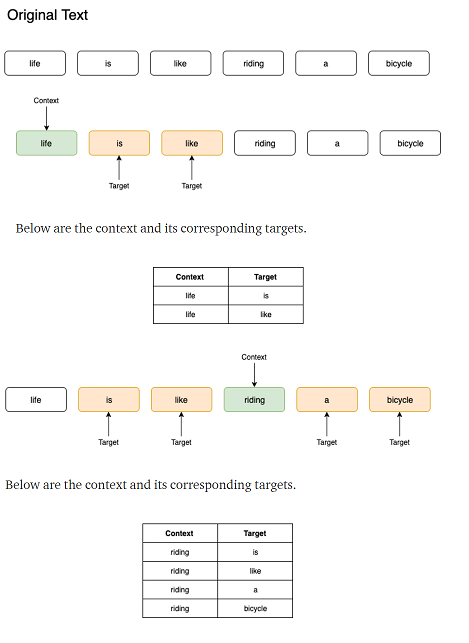

In [ ]:
'''
Skipgram tries to predict the source context words (surrounding words) given a target word (the center word).
Example : “the quick brown fox jumps over the lazy dog”.
Lets say window of size 2
We have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on. 

In above the sentence task is to predict the context [quick, fox] given target word 'brown' or Predict [the, brown] given 
the word 'brown'

For this, we feed our skip-gram model pairs of (X, Y) where X is our input and Y is our label.

We do this by using [(target, context), 1] pairs as positive input samples where target is our word of interest and context 
is a context word occurring near the target word and the positive label 1 indicates this is a contextually relevant pair. 

We also feed in [(target, random), 0] pairs as negative input samples where target is again our word of interest but random 
is just a randomly selected word from our vocabulary which has no context or association with our target word. 
Hence the negative label 0indicates this is a contextually irrelevant pair.

We do this so that the model can then learn which pairs of words are contextually relevant and which are not and generate 
similar embeddings for semantically similar words

In [168]:
from nltk.corpus import gutenberg
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence

sdff = [['The', 'King', 'James', 'Bible'],
        ['The', 'First', 'Book', 'of', 'Moses', 'Called', 'Genesis']]

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(sdff)
word2id = tokenizer.word_index

word2id.items()

id2word = {v:k for k, v in word2id.items()}

wids = [[word2id[y.lower()] for y in x] for x in sdff]

print(wids)
vocab_size = len(word2id)
print("vocab_size ={0}".format(vocab_size))
print('Vocabulary Sample:', list(word2id.items()))

[[1, 2, 3, 4], [1, 5, 6, 7, 8, 9, 10]]
vocab_size =10
Vocabulary Sample: [('the', 1), ('king', 2), ('james', 3), ('bible', 4), ('first', 5), ('book', 6), ('of', 7), ('moses', 8), ('called', 9), ('genesis', 10)]


In [179]:
# Build the corpus vocabulary

from tensorflow.keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(sdff)

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 100

wids= [[word2id[y.lower()] for y in x] for x in sdff]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 11
Vocabulary Sample: [('the', 1), ('king', 2), ('james', 3), ('bible', 4), ('first', 5), ('book', 6), ('of', 7), ('moses', 8), ('called', 9), ('genesis', 10)]


In [180]:
# Build a skip-gram [(target, context), relevancy] generators

# - (word, word in the same window), with label 1 (positive samples).
# - (word, random word from the vocabulary), with label 0 (negative samples).

from tensorflow.keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(king (2), the (1)) -> 0
(the (1), bible (4)) -> 1
(bible (4), james (3)) -> 1
(bible (4), the (1)) -> 0
(king (2), first (5)) -> 0
(james (3), king (2)) -> 1
(the (1), called (9)) -> 0
(james (3), first (5)) -> 0
(king (2), bible (4)) -> 1
(king (2), the (1)) -> 1


### CBOW 'Target' and 'Context Words' Generation

In [ ]:
'''

['beginning', 'god', 'created', 'heaven', 'earth']

sentence_length: 5
WindowSize: 2
index: 0
Word at index 0 : 'beginning'
start = index - window_size
end = index + window_size + 1

start: -2
end: 3

Choosing context word based on condition:
[-2, -1, 0, 1, 2]
range index: -2
range index: -1

range index: 0
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'god'
Word at range index at 1 is 'god'

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'created'
Word at range index at 2 is 'created'

Input: ['god', 'created']
Output: beginning
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['god', 'created']
*****************************
sentence_length: 5
WindowSize: 2
index: 1
Word at index 1 : 'god'
start = index - window_size
end = index + window_size + 1

start: -1
end: 4

Choosing context word based on condition:
[-1, 0, 1, 2, 3]
range index: -1
range index: 0

Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'beginning'
Word at range index at 0 is 'beginning'

range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'created'
Word at range index at 2 is 'created'

range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'heaven'

Word at range index at 3 is 'heaven'
Input: ['beginning', 'created', 'heaven']
Output: god
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['beginning', 'created', 'heaven']
context_words1 : [['beginning', 'created', 'heaven']]
*****************************
sentence_length: 5
WindowSize: 2
index: 2
Word at index 2 : 'created'
start = index - window_size
end = index + window_size + 1
start: 0
end: 5
Choosing context word based on condition:
[0, 1, 2, 3, 4]

range index: 0
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'beginning'
Word at range index at 0 is 'beginning'

range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'god'
Word at range index at 1 is 'god'

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'heaven'
Word at range index at 3 is 'heaven'

range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'earth'

Word at range index at 4 is 'earth'
Input: ['beginning', 'god', 'heaven', 'earth']
Output: created
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['beginning', 'god', 'heaven', 'earth']
context_words1 : [['beginning', 'god', 'heaven', 'earth']]
*****************************
sentence_length: 5
WindowSize: 2
index: 3
Word at index 3 : 'heaven'
start = index - window_size
end = index + window_size + 1
start: 1
end: 6
Choosing context word based on condition:
[1, 2, 3, 4, 5]

range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'god'
Word at range index at 1 is 'god'

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'created'
Word at range index at 2 is 'created'
range index: 3

Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'earth'
Word at range index at 4 is 'earth'

range index: 5
Statisfied the condition '0 <= i' 
Input: ['god', 'created', 'earth']
Output: heaven
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['god', 'created', 'earth']
context_words1 : [['god', 'created', 'earth']]
*****************************
sentence_length: 5
WindowSize: 2
index: 4
Word at index 4 : 'earth'
start = index - window_size
end = index + window_size + 1
start: 2
end: 7
Choosing context word based on condition:
[2, 3, 4, 5, 6]

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'created'
Word at range index at 2 is 'created'

range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'heaven'
Word at range index at 3 is 'heaven'

range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 5
Statisfied the condition '0 <= i' 

range index: 6
Statisfied the condition '0 <= i' 
Input: ['created', 'heaven']
Output: earth
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['created', 'heaven']


###############################################################################
['earth', 'without', 'form', 'void', 'darkness', 'upon', 'face', 'deep']
sentence_length: 8
WindowSize: 2
index: 0
Word at index 0 : 'earth'
start = index - window_size
end = index + window_size + 1

start: -2
end: 3

Choosing context word based on condition:
[-2, -1, 0, 1, 2]

range index: -2
range index: -1

range index: 0
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'without'
Word at range index at 1 is 'without'

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'

Selected Word: 'form'

Word at range index at 2 is 'form'
Input: ['without', 'form']
Output: earth
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['without', 'form']

sentence_length: 8
WindowSize: 2
index: 1
Word at index 1 : 'without'
start = index - window_size
end = index + window_size + 1
start: -1
end: 4
Choosing context word based on condition:
[-1, 0, 1, 2, 3]

range index: -1
range index: 0
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'earth'
Word at range index at 0 is 'earth'

range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'form'
Word at range index at 2 is 'form'

range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'void'

Word at range index at 3 is 'void'
Input: ['earth', 'form', 'void']
Output: without
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['earth', 'form', 'void']
context_words1 : [['earth', 'form', 'void']]
*****************************
sentence_length: 8
WindowSize: 2
index: 2
Word at index 2 : 'form'
start = index - window_size
end = index + window_size + 1

start: 0
end: 5

Choosing context word based on condition:
[0, 1, 2, 3, 4]
range index: 0
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'earth'
Word at range index at 0 is 'earth'

range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'without'
Word at range index at 1 is 'without'

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'void'
Word at range index at 3 is 'void'

range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'darkness'
Word at range index at 4 is 'darkness'

Input: ['earth', 'without', 'void', 'darkness']
Output: form
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['earth', 'without', 'void', 'darkness']
context_words1 : [['earth', 'without', 'void', 'darkness']]
*****************************
sentence_length: 8
WindowSize: 2
index: 3
Word at index 3 : 'void'
start = index - window_size
end = index + window_size + 1

start: 1
end: 6

Choosing context word based on condition:
[1, 2, 3, 4, 5]
range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'without'
Word at range index at 1 is 'without'

range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'form'
Word at range index at 2 is 'form'

range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'darkness'
Word at range index at 4 is 'darkness'

range index: 5
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'

Selected Word: 'upon'
Word at range index at 5 is 'upon'

Input: ['without', 'form', 'darkness', 'upon']
Output: void
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['without', 'form', 'darkness', 'upon']

*****************************
sentence_length: 8
WindowSize: 2
index: 4
Word at index 4 : 'darkness'
start = index - window_size
end = index + window_size + 1

start: 2
end: 7

Choosing context word based on condition:
[2, 3, 4, 5, 6]
range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'form'
Word at range index at 2 is 'form'

range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'void'
Word at range index at 3 is 'void'

range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 

range index: 5
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'upon'
Word at range index at 5 is 'upon'

range index: 6
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'face'
Word at range index at 6 is 'face'

Input: ['form', 'void', 'upon', 'face']
Output: darkness
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['form', 'void', 'upon', 'face']
context_words1 : [['form', 'void', 'upon', 'face']]
*****************************
sentence_length: 8
WindowSize: 2
index: 5
Word at index 5 : 'upon'
start = index - window_size
end = index + window_size + 1
start: 3
end: 8
Choosing context word based on condition:
[3, 4, 5, 6, 7]
range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'void'
Word at range index at 3 is 'void'
range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'darkness'
Word at range index at 4 is 'darkness'
range index: 5
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 6
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'face'
Word at range index at 6 is 'face'
range index: 7
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'deep'
Word at range index at 7 is 'deep'
Input: ['void', 'darkness', 'face', 'deep']
Output: upon
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['void', 'darkness', 'face', 'deep']
context_words1 : [['void', 'darkness', 'face', 'deep']]
*****************************
sentence_length: 8
WindowSize: 2
index: 6
Word at index 6 : 'face'
start = index - window_size
end = index + window_size + 1
start: 4
end: 9
Choosing context word based on condition:
[4, 5, 6, 7, 8]
range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'darkness'
Word at range index at 4 is 'darkness'
range index: 5
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'upon'
Word at range index at 5 is 'upon'
range index: 6
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 7
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'deep'
Word at range index at 7 is 'deep'
range index: 8
Statisfied the condition '0 <= i' 
Input: ['darkness', 'upon', 'deep']
Output: face
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['darkness', 'upon', 'deep']
context_words1 : [['darkness', 'upon', 'deep']]
*****************************
sentence_length: 8
WindowSize: 2
index: 7
Word at index 7 : 'deep'
start = index - window_size
end = index + window_size + 1
start: 5
end: 10
Choosing context word based on condition:
[5, 6, 7, 8, 9]
range index: 5
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'upon'
Word at range index at 5 is 'upon'
range index: 6
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'face'
Word at range index at 6 is 'face'
range index: 7
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 8
Statisfied the condition '0 <= i' 
range index: 9
Statisfied the condition '0 <= i' 
Input: ['upon', 'face']
Output: deep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['upon', 'face']
context_words1 : [['upon', 'face']]
*****************************
###############################################################################
['spirit', 'god', 'moved', 'upon', 'face', 'waters']
sentence_length: 6
WindowSize: 2
index: 0
Word at index 0 : 'spirit'
start = index - window_size
end = index + window_size + 1
start: -2
end: 3
Choosing context word based on condition:
[-2, -1, 0, 1, 2]
range index: -2
range index: -1
range index: 0
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'god'
Word at range index at 1 is 'god'
range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'moved'
Word at range index at 2 is 'moved'
Input: ['god', 'moved']
Output: spirit
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['god', 'moved']
context_words1 : [['god', 'moved']]
*****************************
sentence_length: 6
WindowSize: 2
index: 1
Word at index 1 : 'god'
start = index - window_size
end = index + window_size + 1
start: -1
end: 4
Choosing context word based on condition:
[-1, 0, 1, 2, 3]
range index: -1
range index: 0
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'spirit'
Word at range index at 0 is 'spirit'
range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'moved'
Word at range index at 2 is 'moved'
range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'upon'
Word at range index at 3 is 'upon'
Input: ['spirit', 'moved', 'upon']
Output: god
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['spirit', 'moved', 'upon']
context_words1 : [['spirit', 'moved', 'upon']]
*****************************
sentence_length: 6
WindowSize: 2
index: 2
Word at index 2 : 'moved'
start = index - window_size
end = index + window_size + 1
start: 0
end: 5
Choosing context word based on condition:
[0, 1, 2, 3, 4]
range index: 0
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'spirit'
Word at range index at 0 is 'spirit'
range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'god'
Word at range index at 1 is 'god'
range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'upon'
Word at range index at 3 is 'upon'
range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'face'
Word at range index at 4 is 'face'
Input: ['spirit', 'god', 'upon', 'face']
Output: moved
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['spirit', 'god', 'upon', 'face']
context_words1 : [['spirit', 'god', 'upon', 'face']]
*****************************
sentence_length: 6
WindowSize: 2
index: 3
Word at index 3 : 'upon'
start = index - window_size
end = index + window_size + 1
start: 1
end: 6
Choosing context word based on condition:
[1, 2, 3, 4, 5]
range index: 1
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'god'
Word at range index at 1 is 'god'
range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'moved'
Word at range index at 2 is 'moved'
range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'face'
Word at range index at 4 is 'face'
range index: 5
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'waters'
Word at range index at 5 is 'waters'
Input: ['god', 'moved', 'face', 'waters']
Output: upon
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['god', 'moved', 'face', 'waters']
context_words1 : [['god', 'moved', 'face', 'waters']]
*****************************
sentence_length: 6
WindowSize: 2
index: 4
Word at index 4 : 'face'
start = index - window_size
end = index + window_size + 1
start: 2
end: 7
Choosing context word based on condition:
[2, 3, 4, 5, 6]
range index: 2
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'moved'
Word at range index at 2 is 'moved'
range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'upon'
Word at range index at 3 is 'upon'
range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 5
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'waters'
Word at range index at 5 is 'waters'
range index: 6
Statisfied the condition '0 <= i' 
Input: ['moved', 'upon', 'waters']
Output: face
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['moved', 'upon', 'waters']
context_words1 : [['moved', 'upon', 'waters']]
*****************************
sentence_length: 6
WindowSize: 2
index: 5
Word at index 5 : 'waters'
start = index - window_size
end = index + window_size + 1
start: 3
end: 8
Choosing context word based on condition:
[3, 4, 5, 6, 7]
range index: 3
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'upon'
Word at range index at 3 is 'upon'
range index: 4
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
Statisfied the condition 'i != index'
Selected Word: 'face'
Word at range index at 4 is 'face'
range index: 5
Statisfied the condition '0 <= i' 
Statisfied the condition 'i < sentence_length' 
range index: 6
Statisfied the condition '0 <= i' 
range index: 7
Statisfied the condition '0 <= i' 
Input: ['upon', 'face']
Output: waters
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
context_words : ['upon', 'face']
context_words1 : [['upon', 'face']]
*****************************
###############################################################################